<a href="https://colab.research.google.com/github/superishi/Cybersecurity-Flow-Anomaly-Detection/blob/main/weekdayTimeSeriesClustering3hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def extract_day(time_string):
  day_string = time_string[:10]
  return day_string

In [ ]:
extract_day("2021-08-28")

'28'

In [ ]:
def transform_day(day_time):
  day = extract_day(day_time)
  if day >= 23:
    return (day - 23) * 3 +
  else:
    return (day + 8) * 3 +

In [ ]:
extract_day("2021-08-23 15:00:00")

'23'

### 28, 29, 4, 5 are the weekends

In [ ]:
origData = pd.read_csv("/content/drive/MyDrive/DATA3001 Cyber/by3hours.csv", header = 0)
#print(origData)
origData['edit_time'] = origData['time'] 
origData['edit_time'] = origData['edit_time'].apply(extract_day)
origData = origData.drop(origData[origData.edit_time == "2021-08-28"].index )
origData = origData.drop(origData[origData.edit_time == "2021-08-29"].index )
origData = origData.drop(origData[origData.edit_time == "2021-09-04"].index )
origData = origData.drop(origData[origData.edit_time == "2021-09-05"].index )
print(origData)

                      time   device_mac  ...        v3   edit_time
0      2021-08-23 15:00:00  21:fa:27:56  ... -0.181698  2021-08-23
1      2021-08-23 18:00:00  21:fa:27:56  ... -0.181698  2021-08-23
2      2021-08-23 21:00:00  21:fa:27:56  ... -0.181698  2021-08-23
3      2021-08-24 00:00:00  21:fa:27:56  ... -0.181697  2021-08-24
4      2021-08-24 03:00:00  21:fa:27:56  ... -0.181683  2021-08-24
...                    ...          ...  ...       ...         ...
85187  2021-09-06 03:00:00  ee:dd:4f:cd  ... -0.000430  2021-09-06
85188  2021-09-06 06:00:00  ee:dd:4f:cd  ... -0.000527  2021-09-06
85189  2021-09-06 09:00:00  ee:dd:4f:cd  ... -0.000458  2021-09-06
85190  2021-09-06 12:00:00  ee:dd:4f:cd  ... -0.000095  2021-09-06
85191  2021-09-06 15:00:00  ee:dd:4f:cd  ... -0.000181  2021-09-06

[61064 rows x 7 columns]


In [ ]:
#origData = pd.read_csv("/content/drive/MyDrive/DATA3001 Cyber/by3hours.csv", header = 0)
#origData['time'] = origData['time'].apply(transform_day)
#pd.set_option('display.max_rows', 30)
#print(origData)


       time   device_mac        v0        v1        v2        v3
0         9  21:fa:27:56  0.003341  0.942904 -0.278402 -0.181698
1         9  21:fa:27:56  0.003341  0.942904 -0.278402 -0.181698
2         9  21:fa:27:56  0.003341  0.942904 -0.278402 -0.181698
3         9  21:fa:27:56  0.003341  0.942905 -0.278402 -0.181697
4         9  21:fa:27:56  0.003341  0.942907 -0.278401 -0.181683
...     ...          ...       ...       ...       ...       ...
85187     9  ee:dd:4f:cd  0.999949 -0.004249 -0.002584 -0.000430
85188     9  ee:dd:4f:cd  0.999954 -0.003726 -0.000910 -0.000527
85189     9  ee:dd:4f:cd  0.999952 -0.003872 -0.001447 -0.000458
85190     9  ee:dd:4f:cd  0.999936 -0.004898 -0.005163 -0.000095
85191     9  ee:dd:4f:cd  0.999939 -0.004795 -0.004678 -0.000181

[85192 rows x 6 columns]


In [ ]:
origData2 = origData.groupby(['device_mac']).agg(tuple).applymap(list).reset_index()

In [ ]:
origData.iloc[11235:11250,:]

,time,device_mac,v0,v1,v2,v3,edit_time
15667,2021-08-30 03:00:00,bd:12:69:b5,0.009835,0.291791,0.956205,-0.015157,2021-08-30
15668,2021-08-30 06:00:00,bd:12:69:b5,0.009836,0.292163,0.956091,-0.015183,2021-08-30
15669,2021-08-30 09:00:00,bd:12:69:b5,0.009835,0.291871,0.956181,-0.015216,2021-08-30
15670,2021-08-30 12:00:00,bd:12:69:b5,0.009834,0.291516,0.956286,-0.015494,2021-08-30
15671,2021-08-30 15:00:00,bd:12:69:b5,0.009834,0.291563,0.956270,-0.015629,2021-08-30
15672,2021-08-30 18:00:00,bd:12:69:b5,0.009835,0.291755,0.956217,-0.015129,2021-08-30
15673,2021-08-30 21:00:00,bd:12:69:b5,0.000000,0.000000,0.000000,0.000000,2021-08-30
15674,2021-08-31 00:00:00,bd:12:69:b5,0.000000,0.000000,0.000000,0.000000,2021-08-31
15675,2021-08-31 03:00:00,bd:12:69:b5,0.009918,0.316959,0.948041,-0.021851,2021-08-31
15676,2021-08-31 06:00:00,bd:12:69:b5,0.010172,0.411715,0.910346,-0.038813,2021-08-31


In [ ]:
print(origData2.iloc[752,1],origData2.iloc[752,5][8])
origData2

['2021-08-23 15:00:00', '2021-08-23 18:00:00', '2021-08-23 21:00:00', '2021-08-24 00:00:00', '2021-08-24 03:00:00', '2021-08-24 06:00:00', '2021-08-24 09:00:00', '2021-08-24 12:00:00', '2021-08-24 15:00:00', '2021-08-24 18:00:00', '2021-08-24 21:00:00', '2021-08-25 00:00:00', '2021-08-25 03:00:00', '2021-08-25 06:00:00', '2021-08-25 09:00:00', '2021-08-25 12:00:00', '2021-08-25 15:00:00', '2021-08-25 18:00:00', '2021-08-25 21:00:00', '2021-08-26 00:00:00', '2021-08-26 03:00:00', '2021-08-26 06:00:00', '2021-08-26 09:00:00', '2021-08-26 12:00:00', '2021-08-26 15:00:00', '2021-08-26 18:00:00', '2021-08-26 21:00:00', '2021-08-27 00:00:00', '2021-08-27 03:00:00', '2021-08-27 06:00:00', '2021-08-27 09:00:00', '2021-08-27 12:00:00', '2021-08-27 15:00:00', '2021-08-27 18:00:00', '2021-08-27 21:00:00', '2021-08-30 00:00:00', '2021-08-30 03:00:00', '2021-08-30 06:00:00', '2021-08-30 09:00:00', '2021-08-30 12:00:00', '2021-08-30 15:00:00', '2021-08-30 18:00:00', '2021-08-30 21:00:00', '2021-08-3

,device_mac,time,v0,v1,v2,v3,edit_time
0,21:fa:27:56,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.00334081050253849, 0.0033408104308993588, 0...","[0.9429044241024548, 0.9429044142512728, 0.942...","[-0.2784016167841297, -0.2784016180213763, -0....","[-0.181697553545698, -0.18169761240725688, -0....","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
1,21:fa:27:82,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.003358475160887, 0.003359812368510383, 0.00...","[0.9433938812731848, 0.9434308176908124, 0.943...","[-0.2766578847386801, -0.2765258049771462, -0....","[-0.1818202201413576, -0.181829532306702, -0.1...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
2,21:fa:29:50,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.0033407792445681217, 0.003340779163501228, ...","[0.9429001287431136, 0.9429001173929366, 0.942...","[-0.2784019529444913, -0.2784019532014937, -0....","[-0.18171936876045544, -0.18171941977351747, -...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
3,21:fa:2d:cf,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
4,21:fa:2e:47,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.9999381433376384, 0.999941248789928, 0.9999...","[-0.004813589013406514, -0.004662893953718826,...","[-0.004771565593107728, -0.004236038317921294,...","[-0.000254679922204606, -0.0002926972305043614...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
...,...,...,...,...,...,...,...
752,ee:dd:4e:5f,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.009814147789903636, 0.009813976439310838, 0...","[0.2897121573957682, 0.28967019342575706, 0.28...","[0.9557465709911904, 0.9557566397806428, 0.955...","[-0.049290840916606564, -0.04933743353372632, ...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
753,ee:dd:4e:60,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.9995061421514032, 0.000671083269378415, 0.0...","[-0.003088813429968037, 0.00716501805523162, 0...","[0.0016208022039437774, 0.01977186000747489, 0...","[-0.00010873053263012746, 0.003615976275419743...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
754,ee:dd:4f:4c,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.0030990702697967945, 0.003102211020068737, ...","[0.7104176311036057, 0.7114244704944463, 0.711...","[-0.15257344753610705, -0.15288963345223994, -...","[0.6782021715626994, 0.6776347247896126, 0.677...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
755,ee:dd:4f:57,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.002028720902669358, 0.0020287909996542816, ...","[0.3741160810723536, 0.37408310709931897, 0.37...","[-0.041537287835048085, -0.04149414312057004, ...","[0.9111142495923642, 0.9115289021178986, 0.910...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."


In [ ]:
print("Total number of devices: ", origData['device_mac'].nunique())
print(origData.loc[origData['device_mac'] == "21:fa:27:56"].count())
ds = origData['device_mac'].value_counts()
print(ds)
del origData

Total number of devices:  757
time          81
device_mac    81
v0            81
v1            81
v2            81
v3            81
edit_time     81
dtype: int64
ee:dd:44:be    81
ee:dd:49:30    81
bd:1c:d6:c7    81
bd:1c:cb:4a    81
ee:dd:4c:bc    81
               ..
ee:dd:38:23    81
bd:1c:dc:fb    50
ac:f4:65:4a     7
ac:f2:14:98     7
bd:0d:af:4f     7
Name: device_mac, Length: 757, dtype: int64


Devices bd:1c:dc::fb, ac:f2:14:98, ac:f4:65:4a, bd:0d:af:4f have data missing for some days

In [ ]:
excluded_devices = ["bd:1c:dc:fb", "ac:f2:14:98", "ac:f4:65:4a", "bd:0d:af:4f"]
origData2 = origData2[(origData2['device_mac'] != excluded_devices[0]) & (origData2['device_mac'] != excluded_devices[1]) & (origData2['device_mac'] != excluded_devices[2]) &
                      (origData2['device_mac'] != excluded_devices[3])]
origData2

,device_mac,time,v0,v1,v2,v3,edit_time
0,21:fa:27:56,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.00334081050253849, 0.0033408104308993588, 0...","[0.9429044241024548, 0.9429044142512728, 0.942...","[-0.2784016167841297, -0.2784016180213763, -0....","[-0.181697553545698, -0.18169761240725688, -0....","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
1,21:fa:27:82,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.003358475160887, 0.003359812368510383, 0.00...","[0.9433938812731848, 0.9434308176908124, 0.943...","[-0.2766578847386801, -0.2765258049771462, -0....","[-0.1818202201413576, -0.181829532306702, -0.1...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
2,21:fa:29:50,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.0033407792445681217, 0.003340779163501228, ...","[0.9429001287431136, 0.9429001173929366, 0.942...","[-0.2784019529444913, -0.2784019532014937, -0....","[-0.18171936876045544, -0.18171941977351747, -...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
3,21:fa:2d:cf,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
4,21:fa:2e:47,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.9999381433376384, 0.999941248789928, 0.9999...","[-0.004813589013406514, -0.004662893953718826,...","[-0.004771565593107728, -0.004236038317921294,...","[-0.000254679922204606, -0.0002926972305043614...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
...,...,...,...,...,...,...,...
752,ee:dd:4e:5f,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.009814147789903636, 0.009813976439310838, 0...","[0.2897121573957682, 0.28967019342575706, 0.28...","[0.9557465709911904, 0.9557566397806428, 0.955...","[-0.049290840916606564, -0.04933743353372632, ...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
753,ee:dd:4e:60,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.9995061421514032, 0.000671083269378415, 0.0...","[-0.003088813429968037, 0.00716501805523162, 0...","[0.0016208022039437774, 0.01977186000747489, 0...","[-0.00010873053263012746, 0.003615976275419743...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
754,ee:dd:4f:4c,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.0030990702697967945, 0.003102211020068737, ...","[0.7104176311036057, 0.7114244704944463, 0.711...","[-0.15257344753610705, -0.15288963345223994, -...","[0.6782021715626994, 0.6776347247896126, 0.677...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."
755,ee:dd:4f:57,"[2021-08-23 15:00:00, 2021-08-23 18:00:00, 202...","[0.002028720902669358, 0.0020287909996542816, ...","[0.3741160810723536, 0.37408310709931897, 0.37...","[-0.041537287835048085, -0.04149414312057004, ...","[0.9111142495923642, 0.9115289021178986, 0.910...","[2021-08-23, 2021-08-23, 2021-08-23, 2021-08-2..."


In [ ]:
origData2.to_csv('/content/drive/MyDrive/DATA3001 Cyber/3HourWeekdayDataPerDevice.csv',index=False)

In [ ]:
del origData2

In [ ]:
!cp '/content/drive/MyDrive/DATA3001 Cyber/3HourWeekdayDataPerDevice.csv' "3HourWeekdayDataPerDevice.csv"

In [ ]:
dailyDataPerDevice = pd.read_csv("3HourWeekdayDataPerDevice.csv", header = 0)
dailyDataPerDevice = dailyDataPerDevice.drop(columns=["time","edit_time"])
daily_np = dailyDataPerDevice.to_numpy()
daily_np.shape

(753, 5)

# Defining Dynamic Time Warping function

In [ ]:
import math

In [ ]:
!pip install tslearn

     |████████████████████████████████| 793 kB 16.8 MB/s 


In [ ]:
# possible alternative implementation
from tslearn.metrics import dtw, soft_dtw
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.utils import to_time_series, to_time_series_dataset
#from sklearn_extra.cluster import KMedoids

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
# prepare dataset for clustering
data_for_clustering = [None] * 753
#print(data_for_clustering.shape)

for i in range(753):
  s1 = eval(daily_np[i][1])
  s2 = eval(daily_np[i][2])
  s3 = eval(daily_np[i][3])
  s4 = eval(daily_np[i][4])
  data_for_clustering[i] = [s1, s2, s3, s4]

In [ ]:
data_for_clustering[0]

[[0.00334081050253849,
  0.0033408104308993588,
  0.003340810564605869,
  0.0033408117433727986,
  0.003340831542211075,
  0.0033408315080688178,
  0.0033408319157957013,
  0.0033408314479910733,
  0.0033408174947834905,
  0.0033408107484664213,
  0.003340810771027052,
  0.0033448580625707,
  0.003343732858309009,
  0.003344017132769942,
  0.00334434849933505,
  0.0033443197757234843,
  0.003344319683152229,
  0.0033439971102595238,
  0.0033440460048530306,
  0.003344024042277297,
  0.0033437313288952218,
  0.0033439964125109435,
  0.003344311283925835,
  0.0033447399218653195,
  0.003345827106110191,
  0.0033449410810909067,
  0.00334544659204367,
  0.003345832782132632,
  0.0033449610963559506,
  0.003344886075525342,
  0.0033437221886459013,
  0.003344058573751706,
  0.0033437409871138984,
  0.0,
  0.0,
  0.003342248514872986,
  0.003342272121446769,
  0.003342580128945478,
  0.0033422711530035555,
  0.0033444414224836428,
  0.0033408761514695322,
  0.0033414144748181987,
  0.003342

## Clustering implementation

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
km.fit(data_for_clustering)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=3, n_init=1, n_jobs=None, random_state=None,
                 tol=1e-06, verbose=0)

In [ ]:
len(data_for_clustering[0][0])

81

In [ ]:
cluster_labels = km.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       0, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1,

In [ ]:
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [ ]:
silhouette_score(data_for_clustering, cluster_labels, metric = 'dtw')

0.24858364680779818

In [ ]:
km.inertia_

25.98246578812066

In [ ]:
def evaluation_for_clusters(no_of_clusters):
  km = TimeSeriesKMeans(n_clusters=no_of_clusters, metric="dtw", max_iter = 30)
  km.fit(data_for_clustering)
  cluster_labels = km.labels_
  sil_score = silhouette_score(data_for_clustering, cluster_labels, metric = 'dtw')

  return sil_score, km.inertia_

In [ ]:
print(evaluation_for_clusters(2))

(0.30398195709989834, 27.480607882355272)


In [ ]:
sil_array = []
inter_var_array = []
for i in range(2, 7):
  sil, iner = evaluation_for_clusters(i)
  sil_array.append(sil)
  inter_var_array.append(iner)

In [ ]:
import matplotlib.pyplot as plt

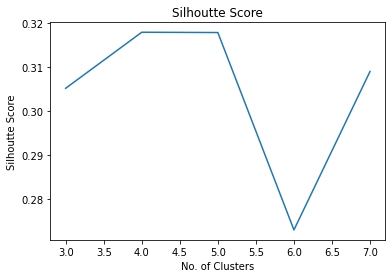

In [ ]:
no_of_clusters = [3,4,5,6,7]
plt.title("Silhoutte Score")
plt.xlabel("No. of Clusters") 
plt.ylabel("Silhoutte Score") 
plt.plot(no_of_clusters, sil_array)
plt.show()

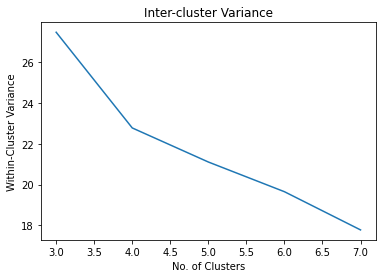

In [ ]:
plt.title("Inter-cluster Variance")
plt.xlabel("No. of Clusters") 
plt.ylabel("Within-Cluster Variance") 
plt.plot(no_of_clusters, inter_var_array)
plt.show()

### 4 Looks be the optimal number of clusters

In [ ]:
km = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter = 30)
km.fit(data_for_clustering)
cluster_labels = km.labels_

In [ ]:
cluster_labels = np.expand_dims(cluster_labels, axis = 1)
cluster_labels.shape

(753, 1)

In [ ]:
devices = np.expand_dims(daily_np[:,0], axis = 1)
devices_with_cluster_labels = np.concatenate((devices ,cluster_labels), axis=1)
devices_with_cluster_labels

array([['21:fa:27:56', 2],
       ['21:fa:27:82', 2],
       ['21:fa:29:50', 2],
       ...,
       ['ee:dd:4f:4c', 0],
       ['ee:dd:4f:57', 0],
       ['ee:dd:4f:cd', 1]], dtype=object)

In [ ]:
dtw(data_for_clustering[9], data_for_clustering[11])

7.717965856576285

In [ ]:
np.savetxt("/content/drive/MyDrive/DATA3001 Cyber/WeekdayDeviceWithClusterLabels3Hours.csv", devices_with_cluster_labels, delimiter=",", fmt='%s')

In [ ]:
# visualisation of DTW using two devices from our dataset
s1 = eval(daily_np[57][1])
s2 = eval(daily_np[750][1])
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path)

AttributeError: ignored

In [ ]:
# takes rows of above numpy array as argument
# this will be used as our distance metric for clustering
def DTW(dev1, dev2):

  DTW_sum = 0

  for i in range(1,len(dev1)):
    DTW_sum += dtaidistance.dtw.distance(eval(dev1[i]), eval(dev2[i]))
    #if you want to use tslearn lib, replace it with dtw(), gives same result
   # path = dtw.warping_path(eval(dev1[i]), eval(dev2[i]))
  #dtwvis.plot_warping(eval(dev1[i]), eval(dev2[i]), path, filename="warp.png")    

  return DTW_sum


In [ ]:
# testing tslearn
s1 = np.concatenate((eval(daily_np[1][1]),eval(daily_np[1][2]),eval(daily_np[1][3]),eval(daily_np[1][4])), axis = 0)
s2 = np.concatenate((eval(daily_np[99][1]),eval(daily_np[99][2]),eval(daily_np[99][3]),eval(daily_np[99][4])), axis = 0)
print(dtw(s1, s2))
s1.shape

1.6003982745895282


(60,)

In [ ]:
# testing tslearn
s1 = np.concatenate((eval(daily_np[1][1])))
s2 = np.concatenate((eval(daily_np[99][1]),eval(daily_np[99][2])))
dtw(s1, s2)

ValueError: ignored

In [ ]:
DTW(daily_np[57], daily_np[750])

3.066573589737781

In [ ]:
#!pip install tslearn
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 6.8 MB/s 
     |████████████████████████████████| 23.1 MB 1.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
s1 = [[5,4],[20,12], [12,100]]
s2 = np.array([[22,3],[6,7], [66,7]])
print(s2.shape)
print(dtw(s1,s2))

s5 = [5,4]
s6 = [22,3]
dtw_5_6 = dtw(s5,s6)
print(dtw_5_6)

s7 = [20,12]
s8 = [6,7]
dtw_7_8 = dtw(s7,s8)
print(dtw_7_8)

s9 = [12,100]
s10 = [66,7]
dtw_9_10 = dtw(s9,s10)
print(dtw_9_10)

print(type(s1))
#print(s1.shape, s2.shape)

print(math.sqrt(dtw_5_6**2 + dtw_7_8**2 + dtw_9_10**2))

s1 = [s5, s7, s9]
print(len(s1), len(s1[0]))

print(dtw(s1,s2))

(3, 2)
109.89085494252923
17.029386365926403
14.866068747318506
107.54068997360952
<class 'list'>
109.89085494252922
3 2
109.89085494252923


In [ ]:
kMeds = KMedoids(n_clusters=3, init='heuristic', metric=DTW)
kMeds.fit(daily_np)

ValueError: ignored